In [2]:
import numpy as np 
import pandas as pd
import os, time, glob 

import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
pd.set_option('display.max_rows', 500)

In [4]:
data_dir = ('/Users/67981492/Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/aggregated_data/')
data_fn = ('cleaned_probC_obs_data.csv')

In [6]:
df = pd.read_csv(os.path.join(data_dir, data_fn))

In [7]:
df.head()

,ID,experiment,condition,trial,shifted_epoch_trial,cp_with_slow_fast,obs_cp_with_slow_fast,p_id_accuracy,rt,lr_choice,...,low_val_cue,obs_accuracy,reward,cumulative_reward,iti,total_trial_time,epoch_n,epoch_trial,n_epoch_trials,prop_112
0,776,volatility,lv,0,0,1.0,0.0,1,0.554065,1.0,...,111.0,1.0,3.0,602.0,0.315112,1.863330,1.0,0,34,0.911765
1,776,volatility,lv,1,1,0.0,0.0,1,0.422159,0.0,...,111.0,1.0,5.0,606.0,0.320283,1.721799,1.0,1,34,0.911765
2,776,volatility,lv,2,2,0.0,0.0,1,0.310826,0.0,...,111.0,1.0,1.0,606.0,0.704584,2.001336,1.0,2,34,0.911765
3,776,volatility,lv,3,3,0.0,1.0,1,0.256866,0.0,...,112.0,0.0,0.0,605.0,0.503199,1.748328,1.0,3,34,0.911765
4,776,volatility,lv,4,4,0.0,1.0,1,0.229932,0.0,...,111.0,1.0,2.0,606.0,0.376770,1.606700,1.0,4,34,0.911765


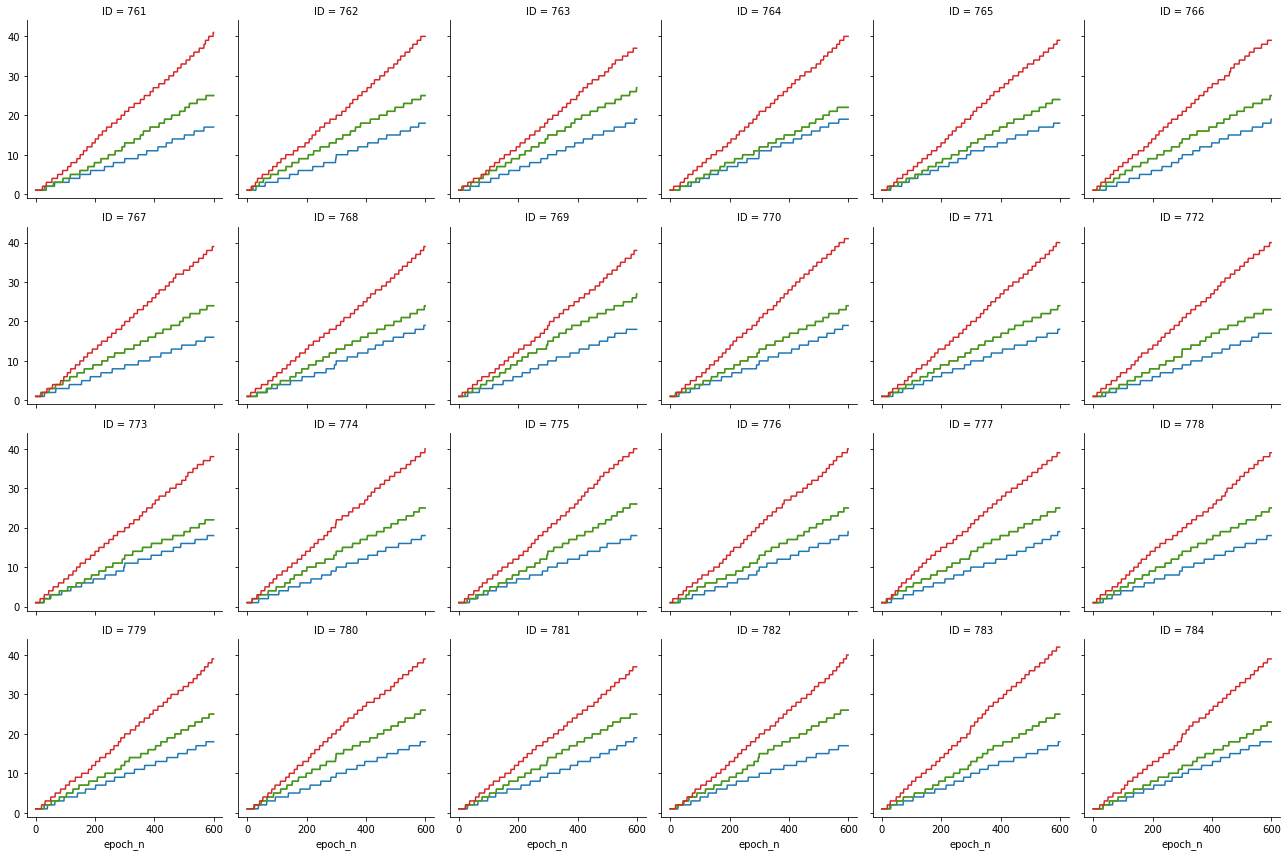

In [8]:
# checking epoch_n 
g = sns.FacetGrid(data=df, col='ID', hue='condition', col_wrap=6)
g.map(plt.plot, 'epoch_n')

In [9]:
# hc / lc lambda = 25
# hv lambda = 15
# lv lambda = 35

# hv / lv p_optimal = 0.75
# hc p_opt = 0.65
# lc p_opt = 0.85

In [10]:
df['gen_lambda'] = np.nan # create lambda var
df['gen_p_opt'] = np.nan # create p_opt var 

In [11]:
df.loc[df.condition == 'lv', 'gen_lambda'] = 35
df.loc[df.condition == 'hv', 'gen_lambda'] = 15

df.loc[df.condition == 'hc', 'gen_lambda'] = 25
df.loc[df.condition == 'lc', 'gen_lambda'] = 25

In [12]:
df.loc[df.condition == 'lc', 'gen_p_opt'] = 0.85
df.loc[df.condition == 'hc', 'gen_p_opt'] = 0.65

df.loc[df.condition == 'hv', 'gen_p_opt'] = 0.75
df.loc[df.condition == 'lv', 'gen_p_opt'] = 0.75

In [13]:
df.head()

,ID,experiment,condition,trial,shifted_epoch_trial,cp_with_slow_fast,obs_cp_with_slow_fast,p_id_accuracy,rt,lr_choice,...,reward,cumulative_reward,iti,total_trial_time,epoch_n,epoch_trial,n_epoch_trials,prop_112,gen_lambda,gen_p_opt
0,776,volatility,lv,0,0,1.0,0.0,1,0.554065,1.0,...,3.0,602.0,0.315112,1.863330,1.0,0,34,0.911765,35.0,0.75
1,776,volatility,lv,1,1,0.0,0.0,1,0.422159,0.0,...,5.0,606.0,0.320283,1.721799,1.0,1,34,0.911765,35.0,0.75
2,776,volatility,lv,2,2,0.0,0.0,1,0.310826,0.0,...,1.0,606.0,0.704584,2.001336,1.0,2,34,0.911765,35.0,0.75
3,776,volatility,lv,3,3,0.0,1.0,1,0.256866,0.0,...,0.0,605.0,0.503199,1.748328,1.0,3,34,0.911765,35.0,0.75
4,776,volatility,lv,4,4,0.0,1.0,1,0.229932,0.0,...,2.0,606.0,0.376770,1.606700,1.0,4,34,0.911765,35.0,0.75


In [14]:
n_epochs = df.groupby(['ID', 'experiment', 'condition'])[['epoch_n', 'epoch_trial']].max()
n_epochs = n_epochs.rename(columns={'epoch_n': 'n_epochs', 'epoch_trial': 'max_epoch_len'})

In [15]:
n_epochs # total n of epochs and maximum epoch length.

n_epochs  max_epoch_len
ID  experiment condition                         
761 conflict   hc             25.0             35
               lc             25.0             35
    volatility hv             41.0             22
               lv             17.0             48
762 conflict   hc             25.0             32
               lc             25.0             32
    volatility hv             40.0             25
               lv             18.0             48
763 conflict   hc             27.0             32
               lc             27.0             32
    volatility hv             37.0             25
               lv             19.0             38
764 conflict   hc             22.0             37
               lc             22.0             37
    volatility hv             40.0             21
               lv             19.0             41
765 conflict   hc             24.0             33
               lc             24.0             33
    volatility hv             39.0             21
               lv             18.0             49
766 conflict   hc             25.0             39
               lc             25.0             39
    volatility hv             39.0             24
               lv             19.0             43
767 conflict   hc             24.0             33
               lc             24.0             33
    volatility hv             39.0             26
               lv             16.0             47
768 conflict   hc             24.0             33
               lc             24.0             33
    volatility hv             39.0             22
               lv             19.0             43
769 conflict   hc             27.0             32
               lc             27.0             32
    volatility hv             38.0             24
               lv             18.0             45
770 conflict   hc             24.0             34
               lc             24.0             34
    volatility hv             41.0             21
               lv             19.0             49
771 conflict   hc             24.0             31
               lc             24.0             31
    volatility hv             40.0             23
               lv             18.0             42
772 conflict   hc             23.0             32
               lc             23.0             32
    volatility hv             40.0             21
               lv             17.0             43
773 conflict   hc             22.0             37
               lc             22.0             37
    volatility hv             38.0             23
               lv             18.0             47
774 conflict   hc             25.0             33
               lc             25.0             33
    volatility hv             40.0             21
               lv             18.0             42
775 conflict   hc             26.0             29
               lc             26.0             29
    volatility hv             40.0             20
               lv             18.0             43
776 conflict   hc             25.0             38
               lc             25.0             38
    volatility hv             40.0             23
               lv             19.0             44
777 conflict   hc             25.0             31
               lc             25.0             31
    volatility hv             39.0             21
               lv             19.0             43
778 conflict   hc             25.0             34
               lc             25.0             34
    volatility hv             39.0             23
               lv             18.0             49
779 conflict   hc             25.0             37
               lc             25.0             37
    volatility hv             39.0             23
               lv             18.0             44
780 conflict   hc             26.0             31
               lc             26.0             31
    volatility hv         

In [16]:
gen_lambda_check = df.groupby(['ID', 'experiment', 'condition']).gen_lambda.unique()

In [17]:
gen_p_opt_check = df.groupby(['ID', 'experiment', 'condition']).gen_p_opt.unique()

In [18]:
print(n_epochs)

                          n_epochs  max_epoch_len
ID  experiment condition                         
761 conflict   hc             25.0             35
               lc             25.0             35
    volatility hv             41.0             22
               lv             17.0             48
762 conflict   hc             25.0             32
               lc             25.0             32
    volatility hv             40.0             25
               lv             18.0             48
763 conflict   hc             27.0             32
               lc             27.0             32
    volatility hv             37.0             25
               lv             19.0             38
764 conflict   hc             22.0             37
               lc             22.0             37
    volatility hv             40.0             21
               lv             19.0             41
765 conflict   hc             24.0             33
               lc             24.0             33


In [19]:
print(gen_lambda_check)

ID   experiment  condition
761  conflict    hc           [25.0]
                 lc           [25.0]
     volatility  hv           [15.0]
                 lv           [35.0]
762  conflict    hc           [25.0]
                 lc           [25.0]
     volatility  hv           [15.0]
                 lv           [35.0]
763  conflict    hc           [25.0]
                 lc           [25.0]
     volatility  hv           [15.0]
                 lv           [35.0]
764  conflict    hc           [25.0]
                 lc           [25.0]
     volatility  hv           [15.0]
                 lv           [35.0]
765  conflict    hc           [25.0]
                 lc           [25.0]
     volatility  hv           [15.0]
                 lv           [35.0]
766  conflict    hc           [25.0]
                 lc           [25.0]
     volatility  hv           [15.0]
                 lv           [35.0]
767  conflict    hc           [25.0]
                 lc           [25.0]
     volati

In [20]:
print(gen_p_opt_check)

ID   experiment  condition
761  conflict    hc           [0.65]
                 lc           [0.85]
     volatility  hv           [0.75]
                 lv           [0.75]
762  conflict    hc           [0.65]
                 lc           [0.85]
     volatility  hv           [0.75]
                 lv           [0.75]
763  conflict    hc           [0.65]
                 lc           [0.85]
     volatility  hv           [0.75]
                 lv           [0.75]
764  conflict    hc           [0.65]
                 lc           [0.85]
     volatility  hv           [0.75]
                 lv           [0.75]
765  conflict    hc           [0.65]
                 lc           [0.85]
     volatility  hv           [0.75]
                 lv           [0.75]
766  conflict    hc           [0.65]
                 lc           [0.85]
     volatility  hv           [0.75]
                 lv           [0.75]
767  conflict    hc           [0.65]
                 lc           [0.85]
     volati

/Users/67981492/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


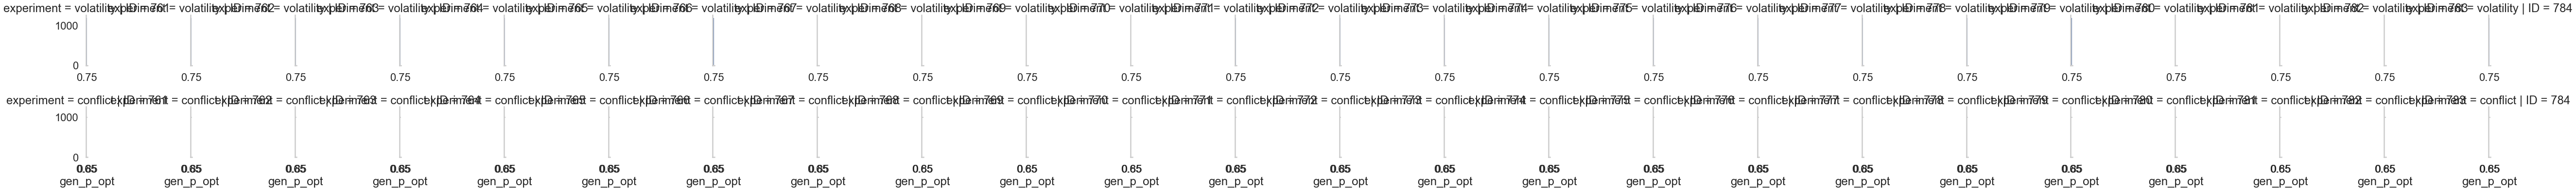

In [565]:
g = sns.FacetGrid(df,  col="ID", row='experiment', sharex=False)
g = g.map(sns.countplot, "gen_p_opt")

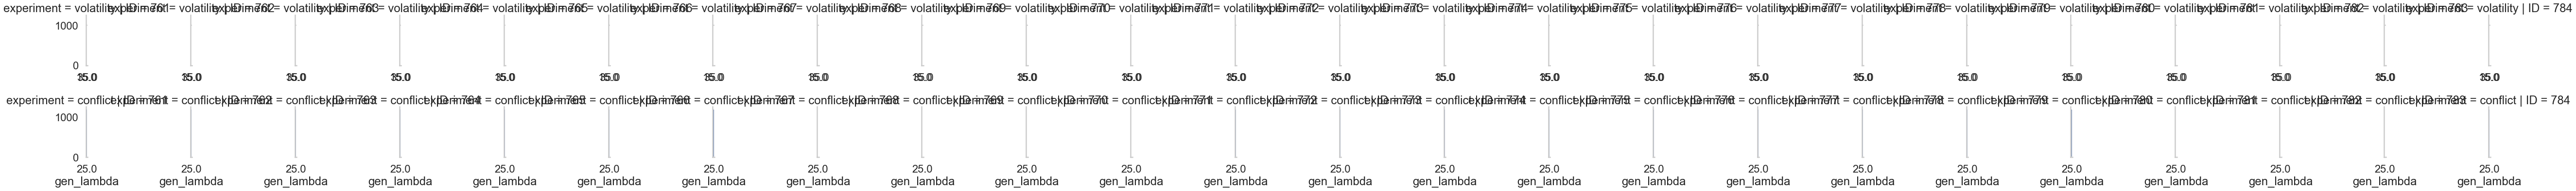

In [566]:
g = sns.FacetGrid(df,  col="ID", row='experiment', sharex=False)
g = g.map(sns.countplot, "gen_lambda")

In [567]:
df.groupby('gen_lambda').n_epoch_trials.unique()

gen_lambda
15.0    [19, 10, 20, 14, 11, 15, 12, 16, 18, 13, 21, 2...
25.0    [16, 21, 17, 29, 24, 27, 31, 22, 32, 18, 4, 23...
35.0    [34, 41, 35, 42, 37, 28, 8, 26, 45, 31, 40, 29...
Name: n_epoch_trials, dtype: object

In [568]:
df.groupby('gen_lambda').n_epoch_trials.std()

gen_lambda
15.0    3.666535
25.0    5.240255
35.0    6.634941
Name: n_epoch_trials, dtype: float64

<Figure size 432x288 with 0 Axes>

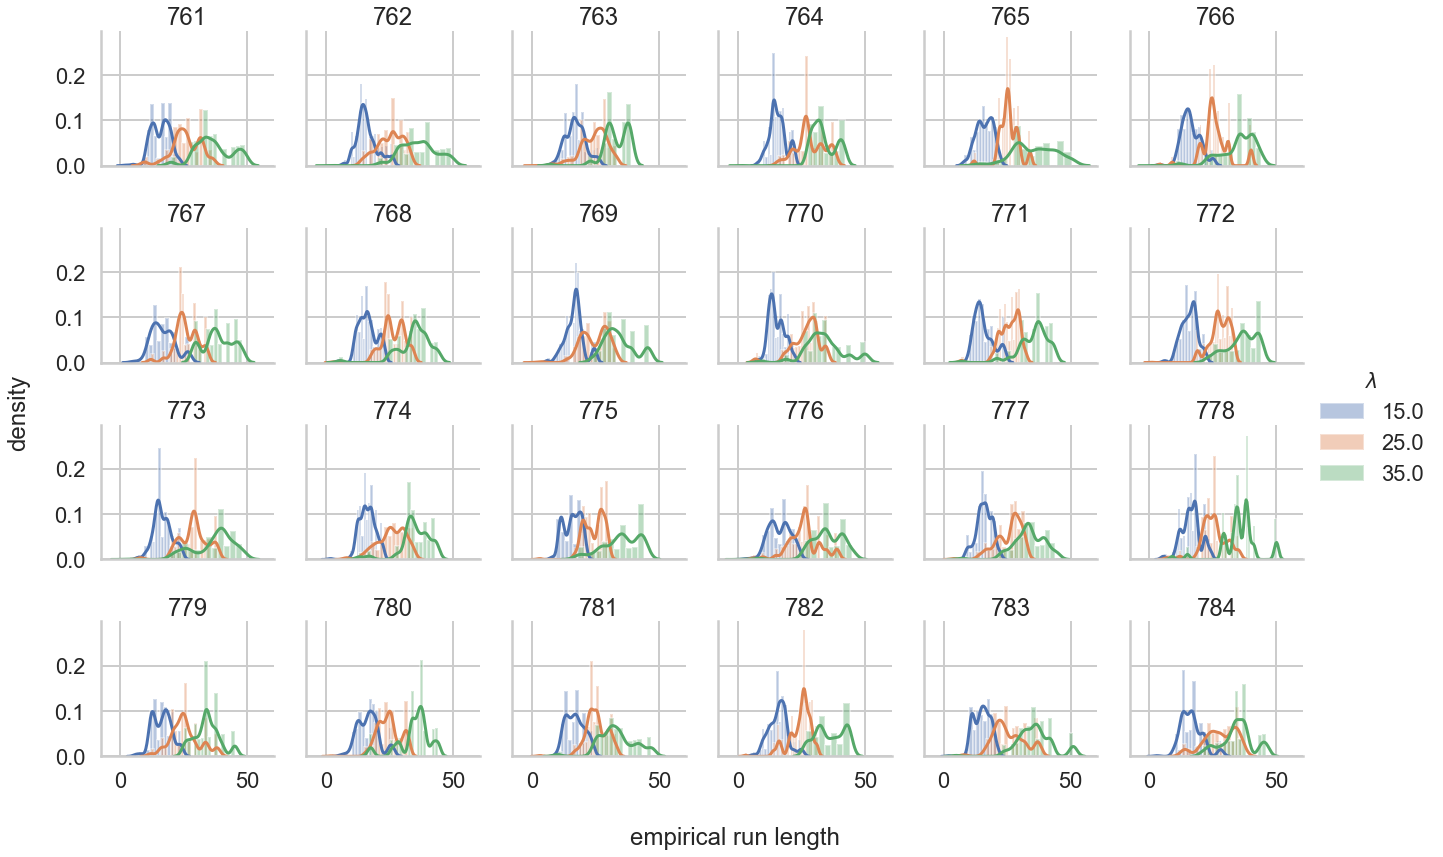

In [153]:
sns.set(font_scale=2, style='whitegrid'); sns.despine(); sns.set_context('poster')

g = sns.FacetGrid(df,  hue="gen_lambda", col='ID', col_wrap=6)
g = (g.map(sns.distplot, "n_epoch_trials")).add_legend()
g._legend.set_title(r'$\lambda$')

g.set_axis_labels('', '') 

# super ylabel
g.fig.text(x=-0.01, y=0.5, 
           verticalalignment='center',
           s='density',
         
           rotation=90) 

# super xlabel
g.fig.text(x=0.5, y=0, 
           horizontalalignment='center', 
           s='empirical run length',
         )
g.set_titles("{col_name}")  # use this argument literally

In [21]:
random_subject = df.ID.sample().values[0]
sample_data = df.loc[df.ID == random_subject].reset_index(drop=True)

In [22]:
sample_data.head()

,ID,experiment,condition,trial,shifted_epoch_trial,cp_with_slow_fast,obs_cp_with_slow_fast,p_id_accuracy,rt,lr_choice,...,reward,cumulative_reward,iti,total_trial_time,epoch_n,epoch_trial,n_epoch_trials,prop_112,gen_lambda,gen_p_opt
0,777,conflict,lc,0,0,1.0,0.0,1,0.755284,0.0,...,3.0,602.0,0.594449,2.342904,1.0,0,16,0.875,25.0,0.85
1,777,conflict,lc,1,1,0.0,0.0,0,0.593914,0.0,...,0.0,601.0,0.466727,2.038654,1.0,1,16,0.875,25.0,0.85
2,777,conflict,lc,2,2,0.0,0.0,1,0.689023,0.0,...,4.0,604.0,0.472454,2.155747,1.0,2,16,0.875,25.0,0.85
3,777,conflict,lc,3,3,0.0,0.0,1,0.640144,0.0,...,3.0,606.0,0.264370,1.891617,1.0,3,16,0.875,25.0,0.85
4,777,conflict,lc,4,4,0.0,0.0,1,0.475835,1.0,...,2.0,607.0,0.321186,1.773515,1.0,4,16,0.875,25.0,0.85


In [23]:
tested_epoch_lens = np.arange(sample_data.epoch_trial.min(), sample_data.epoch_trial.max())
original_dataset_len = len(sample_data)
original_hv_len = len(sample_data.loc[sample_data.condition == 'hv'])
original_lv_len = len(sample_data.loc[sample_data.condition == 'lv'])


p_hv_data_used = []
p_lv_data_used = []

for epoch_len in tested_epoch_lens:
    data_subset = sample_data.loc[sample_data.epoch_trial <= epoch_len]
    p_hv_data_used.append(len(data_subset.loc[data_subset.condition == 'hv']) / original_hv_len)
    p_lv_data_used.append(len(data_subset.loc[data_subset.condition == 'lv']) / original_lv_len)

In [24]:
p_data_used_df = pd.DataFrame({'hv_data_used': p_hv_data_used, 
                               'lv_data_used': p_lv_data_used, 
                              'epoch_len': tested_epoch_lens + 1})

In [25]:
p_data_used_df.head()

,hv_data_used,lv_data_used,epoch_len
0,0.065,0.031667,1
1,0.130,0.063333,2
2,0.195,0.095000,3
3,0.260,0.126667,4
4,0.325,0.158333,5


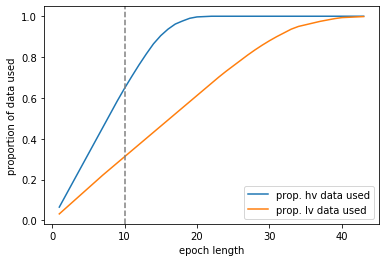

In [26]:
# this neglects set membership (e.g. an epoch length of 3 trials is fully included by 8 trials, but overlap is not high)
plt.plot(p_data_used_df.epoch_len, p_data_used_df.hv_data_used, label='prop. hv data used')
plt.plot(p_data_used_df.epoch_len, p_data_used_df.lv_data_used, label='prop. lv data used')
plt.xlabel('epoch length')
plt.ylabel('proportion of data used')
plt.axvline(x=10, linestyle='--', color='gray')
plt.legend()

# would need ot maximize epoch length while minimizing distance between curves

In [27]:
p_data_used_df['prop_distance'] = p_data_used_df.hv_data_used - p_data_used_df.lv_data_used
epoch_len_peak_distance = np.argmax(p_data_used_df.prop_distance, axis=0)

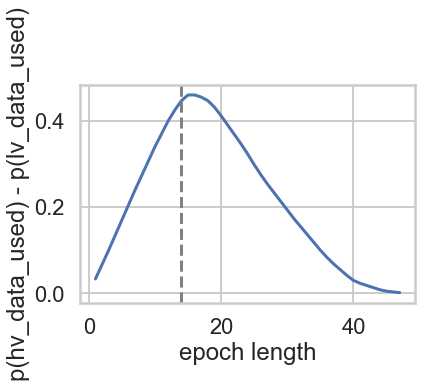

In [234]:
# considering conditional representation.
plt.plot(p_data_used_df.epoch_len, p_data_used_df.prop_distance)
plt.xlabel('epoch length')
plt.ylabel('p(hv_data_used) - p(lv_data_used)')
plt.axvline(x=epoch_len_peak_distance, linestyle='--', color='gray')
# would need to maximize epoch length while minimizing distance between curves

In [365]:
epoch_trial_count = df.groupby(['condition', 'ID', 'epoch_trial', 'experiment']).epoch_trial.agg(['count']).reset_index()

In [366]:
epoch_trial_count = epoch_trial_count.rename(columns={'count':'epoch_trial_count'})

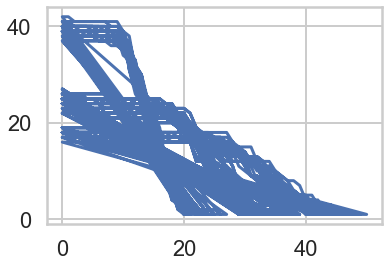

In [367]:
plt.plot(epoch_trial_count.epoch_trial, epoch_trial_count.epoch_trial_count)

/Users/67981492/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


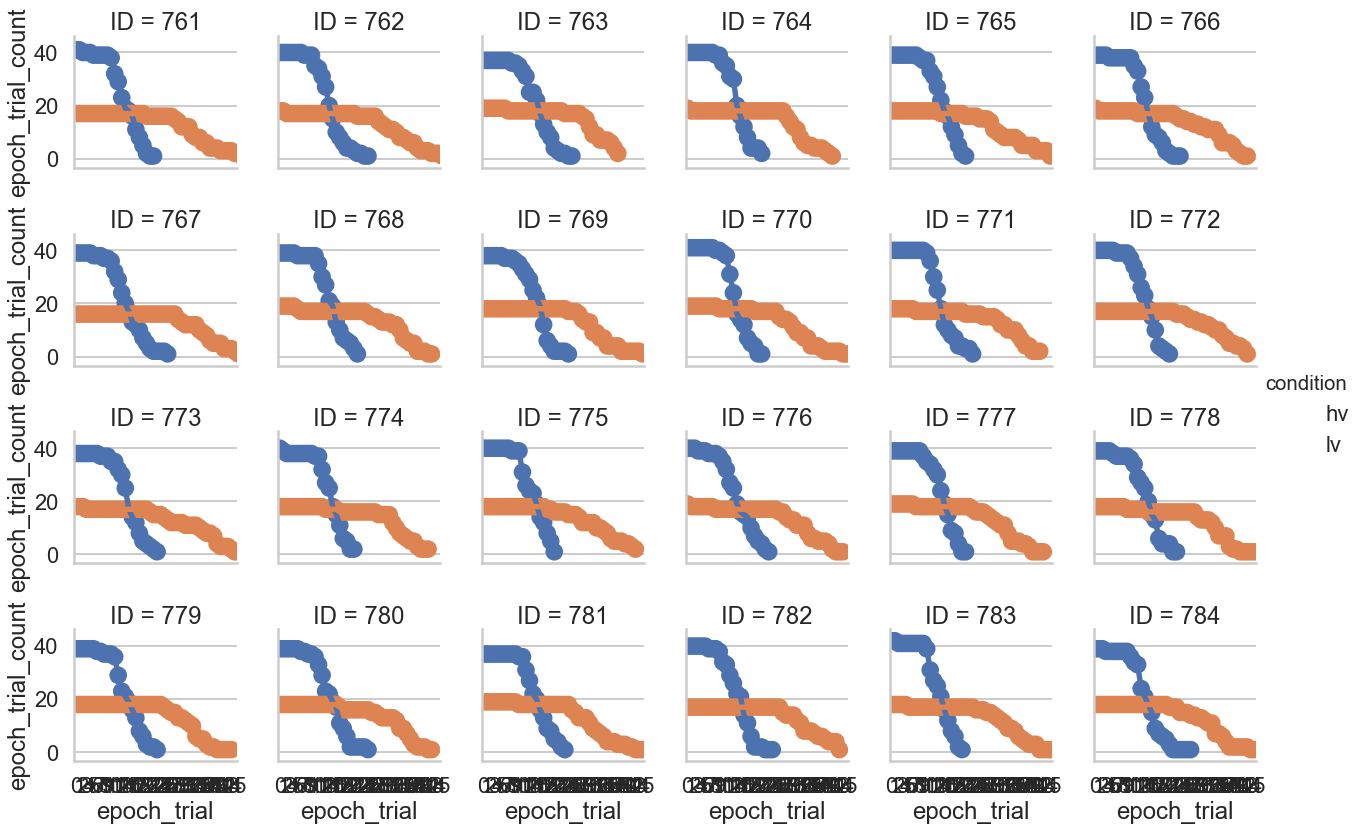

In [370]:
g = sns.FacetGrid(epoch_trial_count.loc[epoch_trial_count.experiment == 'volatility'],  hue="condition", col='ID', col_wrap=6)
g = (g.map(sns.pointplot, "epoch_trial", "epoch_trial_count")).add_legend()
# change the x tick 
# figure out why legend is messed up
# calculate distance between 

/Users/67981492/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 432x288 with 0 Axes>

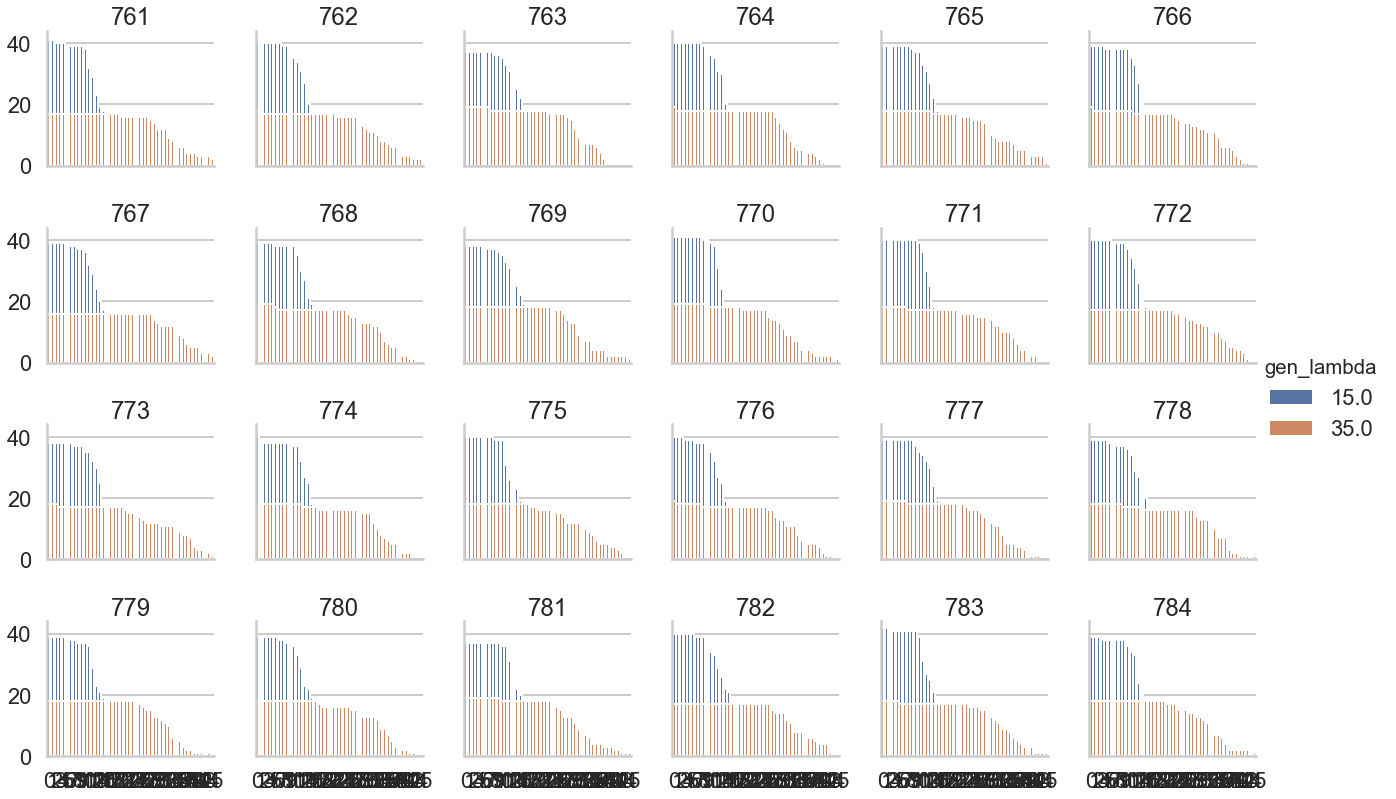

In [376]:
sns.set(font_scale=2, style='whitegrid'); sns.despine(); sns.set_context('poster')

g = sns.FacetGrid(df.loc[df.experiment == 'volatility'],  hue="gen_lambda", col='ID', col_wrap=6)
g = (g.map(sns.countplot, "epoch_trial")).add_legend()
g._legend.set_title('gen_lambda')

g.set_axis_labels('', '') 

# # super ylabel
# g.fig.text(x=-0.01, y=0.5, 
#            verticalalignment='center',
#            s='density',
         
#            rotation=90) 

# # super xlabel
# g.fig.text(x=0.5, y=0, 
#            horizontalalignment='center', 
#            s='empirical run length',
#          )
g.set_titles("{col_name}")  # use this argument literally
# g.set(xticks=df.epoch_trial.unique()[::5])


In [28]:
global_max_epoch_len = df.n_epoch_trials.max()

In [44]:
def pad_df(df, pad_len=global_max_epoch_len):
    dfs = []
    for epoch_n in df.epoch_n.unique():
        epoch_data = df.loc[df.epoch_n == epoch_n]
        epoch_trials = epoch_data.epoch_trial.values
        
        if (pad_len - len(epoch_trials)) != 0:
            print('epoch_n ', epoch_n)
            len_diff = pad_len - len(epoch_trials)
            print('length diff from padded len ', len_diff)
            epoch_trials_mod = np.append(epoch_trials, np.repeat(np.nan, len_diff))
            abs_epoch_trial = np.arange(0, pad_len)
            print('final epoch len ', len(epoch_trials_mod))
        dfs.append(pd.DataFrame({'abs_epoch_trial': abs_epoch_trial, 'epoch_trial': epoch_trials_mod, 'condition': np.repeat(epoch_data.condition.unique(),pad_len),
                             'ID': np.repeat(epoch_data.ID.unique(), pad_len), 'experiment': np.repeat(epoch_data.experiment.unique(),pad_len),
                              'gen_lambda': np.repeat(epoch_data.gen_lambda.unique(), pad_len),
                                        'gen_p_opt': np.repeat(epoch_data.gen_p_opt.unique(), pad_len), 
                                        'epoch_n': np.repeat(epoch_data.epoch_n.unique(), pad_len)}))
    condition_df = pd.concat(dfs, axis=0)

    return condition_df

In [48]:
condition_dfs = []

for ID in df.ID.unique():
    for condition in df.condition.unique(): 
        condition_data = df.loc[(df.ID == ID) & (df.condition == condition)]
        condition_df = pad_df(condition_data)
        condition_dfs.append(condition_df)

epoch_n  1.0
length diff from padded len  17
final epoch len  51
epoch_n  2.0
length diff from padded len  10
final epoch len  51
epoch_n  3.0
length diff from padded len  10
final epoch len  51
epoch_n  4.0
length diff from padded len  16
final epoch len  51
epoch_n  5.0
length diff from padded len  9
final epoch len  51
epoch_n  6.0
length diff from padded len  17
final epoch len  51
epoch_n  7.0
length diff from padded len  14
final epoch len  51
epoch_n  8.0
length diff from padded len  23
final epoch len  51
epoch_n  9.0
length diff from padded len  43
final epoch len  51
epoch_n  10.0
length diff from padded len  25
final epoch len  51
epoch_n  11.0
length diff from padded len  17
final epoch len  51
epoch_n  12.0
length diff from padded len  6
final epoch len  51
epoch_n  13.0
length diff from padded len  23
final epoch len  51
epoch_n  14.0
length diff from padded len  16
final epoch len  51
epoch_n  15.0
length diff from padded len  20
final epoch len  51
epoch_n  16.0
length 

epoch_n  1.0
length diff from padded len  32
final epoch len  51
epoch_n  2.0
length diff from padded len  37
final epoch len  51
epoch_n  3.0
length diff from padded len  38
final epoch len  51
epoch_n  4.0
length diff from padded len  40
final epoch len  51
epoch_n  5.0
length diff from padded len  41
final epoch len  51
epoch_n  6.0
length diff from padded len  35
final epoch len  51
epoch_n  7.0
length diff from padded len  34
final epoch len  51
epoch_n  8.0
length diff from padded len  41
final epoch len  51
epoch_n  9.0
length diff from padded len  36
final epoch len  51
epoch_n  10.0
length diff from padded len  39
final epoch len  51
epoch_n  11.0
length diff from padded len  37
final epoch len  51
epoch_n  12.0
length diff from padded len  36
final epoch len  51
epoch_n  13.0
length diff from padded len  36
final epoch len  51
epoch_n  14.0
length diff from padded len  33
final epoch len  51
epoch_n  15.0
length diff from padded len  31
final epoch len  51
epoch_n  16.0
lengt

epoch_n  1.0
length diff from padded len  20
final epoch len  51
epoch_n  2.0
length diff from padded len  9
final epoch len  51
epoch_n  3.0
length diff from padded len  18
final epoch len  51
epoch_n  4.0
length diff from padded len  15
final epoch len  51
epoch_n  5.0
length diff from padded len  14
final epoch len  51
epoch_n  6.0
length diff from padded len  13
final epoch len  51
epoch_n  7.0
length diff from padded len  24
final epoch len  51
epoch_n  8.0
length diff from padded len  19
final epoch len  51
epoch_n  9.0
length diff from padded len  27
final epoch len  51
epoch_n  10.0
length diff from padded len  21
final epoch len  51
epoch_n  11.0
length diff from padded len  22
final epoch len  51
epoch_n  12.0
length diff from padded len  16
final epoch len  51
epoch_n  14.0
length diff from padded len  9
final epoch len  51
epoch_n  15.0
length diff from padded len  12
final epoch len  51
epoch_n  16.0
length diff from padded len  18
final epoch len  51
epoch_n  17.0
length 

epoch_n  11.0
length diff from padded len  20
final epoch len  51
epoch_n  12.0
length diff from padded len  44
final epoch len  51
epoch_n  13.0
length diff from padded len  28
final epoch len  51
epoch_n  14.0
length diff from padded len  21
final epoch len  51
epoch_n  15.0
length diff from padded len  24
final epoch len  51
epoch_n  16.0
length diff from padded len  29
final epoch len  51
epoch_n  17.0
length diff from padded len  21
final epoch len  51
epoch_n  18.0
length diff from padded len  23
final epoch len  51
epoch_n  19.0
length diff from padded len  22
final epoch len  51
epoch_n  20.0
length diff from padded len  25
final epoch len  51
epoch_n  21.0
length diff from padded len  32
final epoch len  51
epoch_n  22.0
length diff from padded len  17
final epoch len  51
epoch_n  23.0
length diff from padded len  26
final epoch len  51
epoch_n  24.0
length diff from padded len  44
final epoch len  51
epoch_n  1.0
length diff from padded len  29
final epoch len  51
epoch_n  2.

epoch_n  7.0
length diff from padded len  31
final epoch len  51
epoch_n  8.0
length diff from padded len  28
final epoch len  51
epoch_n  9.0
length diff from padded len  26
final epoch len  51
epoch_n  10.0
length diff from padded len  27
final epoch len  51
epoch_n  11.0
length diff from padded len  30
final epoch len  51
epoch_n  12.0
length diff from padded len  28
final epoch len  51
epoch_n  13.0
length diff from padded len  22
final epoch len  51
epoch_n  14.0
length diff from padded len  26
final epoch len  51
epoch_n  15.0
length diff from padded len  23
final epoch len  51
epoch_n  16.0
length diff from padded len  26
final epoch len  51
epoch_n  17.0
length diff from padded len  21
final epoch len  51
epoch_n  18.0
length diff from padded len  24
final epoch len  51
epoch_n  19.0
length diff from padded len  21
final epoch len  51
epoch_n  20.0
length diff from padded len  26
final epoch len  51
epoch_n  21.0
length diff from padded len  21
final epoch len  51
epoch_n  22.0

epoch_n  1.0
length diff from padded len  24
final epoch len  51
epoch_n  2.0
length diff from padded len  30
final epoch len  51
epoch_n  3.0
length diff from padded len  11
final epoch len  51
epoch_n  4.0
length diff from padded len  20
final epoch len  51
epoch_n  5.0
length diff from padded len  15
final epoch len  51
epoch_n  6.0
length diff from padded len  12
final epoch len  51
epoch_n  7.0
length diff from padded len  11
final epoch len  51
epoch_n  8.0
length diff from padded len  14
final epoch len  51
epoch_n  9.0
length diff from padded len  25
final epoch len  51
epoch_n  10.0
length diff from padded len  48
final epoch len  51
epoch_n  11.0
length diff from padded len  6
final epoch len  51
epoch_n  12.0
length diff from padded len  7
final epoch len  51
epoch_n  13.0
length diff from padded len  16
final epoch len  51
epoch_n  14.0
length diff from padded len  11
final epoch len  51
epoch_n  15.0
length diff from padded len  26
final epoch len  51
epoch_n  16.0
length 

epoch_n  18.0
length diff from padded len  32
final epoch len  51
epoch_n  19.0
length diff from padded len  20
final epoch len  51
epoch_n  20.0
length diff from padded len  24
final epoch len  51
epoch_n  21.0
length diff from padded len  23
final epoch len  51
epoch_n  22.0
length diff from padded len  22
final epoch len  51
epoch_n  23.0
length diff from padded len  23
final epoch len  51
epoch_n  24.0
length diff from padded len  20
final epoch len  51
epoch_n  25.0
length diff from padded len  21
final epoch len  51
epoch_n  26.0
length diff from padded len  37
final epoch len  51
epoch_n  27.0
length diff from padded len  50
final epoch len  51
epoch_n  1.0
length diff from padded len  39
final epoch len  51
epoch_n  2.0
length diff from padded len  32
final epoch len  51
epoch_n  3.0
length diff from padded len  35
final epoch len  51
epoch_n  4.0
length diff from padded len  35
final epoch len  51
epoch_n  5.0
length diff from padded len  36
final epoch len  51
epoch_n  6.0
le

epoch_n  6.0
length diff from padded len  23
final epoch len  51
epoch_n  7.0
length diff from padded len  15
final epoch len  51
epoch_n  8.0
length diff from padded len  21
final epoch len  51
epoch_n  9.0
length diff from padded len  22
final epoch len  51
epoch_n  10.0
length diff from padded len  37
final epoch len  51
epoch_n  11.0
length diff from padded len  6
final epoch len  51
epoch_n  12.0
length diff from padded len  6
final epoch len  51
epoch_n  13.0
length diff from padded len  19
final epoch len  51
epoch_n  14.0
length diff from padded len  22
final epoch len  51
epoch_n  15.0
length diff from padded len  10
final epoch len  51
epoch_n  16.0
length diff from padded len  14
final epoch len  51
epoch_n  17.0
length diff from padded len  1
final epoch len  51
epoch_n  18.0
length diff from padded len  30
final epoch len  51
epoch_n  1.0
length diff from padded len  25
final epoch len  51
epoch_n  2.0
length diff from padded len  22
final epoch len  51
epoch_n  3.0
length

epoch_n  12.0
length diff from padded len  17
final epoch len  51
epoch_n  13.0
length diff from padded len  20
final epoch len  51
epoch_n  14.0
length diff from padded len  29
final epoch len  51
epoch_n  15.0
length diff from padded len  25
final epoch len  51
epoch_n  16.0
length diff from padded len  26
final epoch len  51
epoch_n  17.0
length diff from padded len  26
final epoch len  51
epoch_n  18.0
length diff from padded len  24
final epoch len  51
epoch_n  19.0
length diff from padded len  22
final epoch len  51
epoch_n  20.0
length diff from padded len  39
final epoch len  51
epoch_n  21.0
length diff from padded len  28
final epoch len  51
epoch_n  22.0
length diff from padded len  18
final epoch len  51
epoch_n  23.0
length diff from padded len  27
final epoch len  51
epoch_n  24.0
length diff from padded len  28
final epoch len  51
epoch_n  1.0
length diff from padded len  29
final epoch len  51
epoch_n  2.0
length diff from padded len  35
final epoch len  51
epoch_n  3.0

epoch_n  15.0
length diff from padded len  18
final epoch len  51
epoch_n  16.0
length diff from padded len  18
final epoch len  51
epoch_n  17.0
length diff from padded len  18
final epoch len  51
epoch_n  1.0
length diff from padded len  15
final epoch len  51
epoch_n  2.0
length diff from padded len  27
final epoch len  51
epoch_n  3.0
length diff from padded len  19
final epoch len  51
epoch_n  4.0
length diff from padded len  26
final epoch len  51
epoch_n  5.0
length diff from padded len  19
final epoch len  51
epoch_n  6.0
length diff from padded len  24
final epoch len  51
epoch_n  7.0
length diff from padded len  29
final epoch len  51
epoch_n  8.0
length diff from padded len  29
final epoch len  51
epoch_n  9.0
length diff from padded len  26
final epoch len  51
epoch_n  10.0
length diff from padded len  28
final epoch len  51
epoch_n  11.0
length diff from padded len  28
final epoch len  51
epoch_n  12.0
length diff from padded len  42
final epoch len  51
epoch_n  13.0
lengt

epoch_n  1.0
length diff from padded len  38
final epoch len  51
epoch_n  2.0
length diff from padded len  38
final epoch len  51
epoch_n  3.0
length diff from padded len  36
final epoch len  51
epoch_n  4.0
length diff from padded len  34
final epoch len  51
epoch_n  5.0
length diff from padded len  40
final epoch len  51
epoch_n  6.0
length diff from padded len  35
final epoch len  51
epoch_n  7.0
length diff from padded len  36
final epoch len  51
epoch_n  8.0
length diff from padded len  33
final epoch len  51
epoch_n  9.0
length diff from padded len  37
final epoch len  51
epoch_n  10.0
length diff from padded len  31
final epoch len  51
epoch_n  11.0
length diff from padded len  32
final epoch len  51
epoch_n  12.0
length diff from padded len  36
final epoch len  51
epoch_n  13.0
length diff from padded len  40
final epoch len  51
epoch_n  14.0
length diff from padded len  37
final epoch len  51
epoch_n  15.0
length diff from padded len  40
final epoch len  51
epoch_n  16.0
lengt

epoch_n  1.0
length diff from padded len  14
final epoch len  51
epoch_n  2.0
length diff from padded len  23
final epoch len  51
epoch_n  3.0
length diff from padded len  17
final epoch len  51
epoch_n  4.0
length diff from padded len  23
final epoch len  51
epoch_n  5.0
length diff from padded len  15
final epoch len  51
epoch_n  6.0
length diff from padded len  19
final epoch len  51
epoch_n  7.0
length diff from padded len  7
final epoch len  51
epoch_n  8.0
length diff from padded len  8
final epoch len  51
epoch_n  9.0
length diff from padded len  33
final epoch len  51
epoch_n  10.0
length diff from padded len  19
final epoch len  51
epoch_n  11.0
length diff from padded len  16
final epoch len  51
epoch_n  12.0
length diff from padded len  11
final epoch len  51
epoch_n  13.0
length diff from padded len  24
final epoch len  51
epoch_n  14.0
length diff from padded len  9
final epoch len  51
epoch_n  15.0
length diff from padded len  27
final epoch len  51
epoch_n  16.0
length d

epoch_n  13.0
length diff from padded len  36
final epoch len  51
epoch_n  14.0
length diff from padded len  24
final epoch len  51
epoch_n  15.0
length diff from padded len  22
final epoch len  51
epoch_n  16.0
length diff from padded len  19
final epoch len  51
epoch_n  17.0
length diff from padded len  32
final epoch len  51
epoch_n  18.0
length diff from padded len  14
final epoch len  51
epoch_n  19.0
length diff from padded len  28
final epoch len  51
epoch_n  20.0
length diff from padded len  28
final epoch len  51
epoch_n  21.0
length diff from padded len  26
final epoch len  51
epoch_n  22.0
length diff from padded len  30
final epoch len  51
epoch_n  23.0
length diff from padded len  37
final epoch len  51
epoch_n  1.0
length diff from padded len  17
final epoch len  51
epoch_n  2.0
length diff from padded len  30
final epoch len  51
epoch_n  3.0
length diff from padded len  22
final epoch len  51
epoch_n  4.0
length diff from padded len  27
final epoch len  51
epoch_n  5.0
l

epoch_n  11.0
length diff from padded len  41
final epoch len  51
epoch_n  12.0
length diff from padded len  32
final epoch len  51
epoch_n  13.0
length diff from padded len  32
final epoch len  51
epoch_n  14.0
length diff from padded len  43
final epoch len  51
epoch_n  15.0
length diff from padded len  38
final epoch len  51
epoch_n  16.0
length diff from padded len  35
final epoch len  51
epoch_n  17.0
length diff from padded len  39
final epoch len  51
epoch_n  18.0
length diff from padded len  35
final epoch len  51
epoch_n  19.0
length diff from padded len  38
final epoch len  51
epoch_n  20.0
length diff from padded len  36
final epoch len  51
epoch_n  21.0
length diff from padded len  36
final epoch len  51
epoch_n  22.0
length diff from padded len  40
final epoch len  51
epoch_n  23.0
length diff from padded len  37
final epoch len  51
epoch_n  24.0
length diff from padded len  31
final epoch len  51
epoch_n  25.0
length diff from padded len  39
final epoch len  51
epoch_n  2

epoch_n  37.0
length diff from padded len  35
final epoch len  51
epoch_n  38.0
length diff from padded len  34
final epoch len  51
epoch_n  39.0
length diff from padded len  36
final epoch len  51
epoch_n  40.0
length diff from padded len  50
final epoch len  51
epoch_n  1.0
length diff from padded len  11
final epoch len  51
epoch_n  2.0
length diff from padded len  26
final epoch len  51
epoch_n  3.0
length diff from padded len  20
final epoch len  51
epoch_n  4.0
length diff from padded len  6
final epoch len  51
epoch_n  5.0
length diff from padded len  24
final epoch len  51
epoch_n  6.0
length diff from padded len  17
final epoch len  51
epoch_n  7.0
length diff from padded len  16
final epoch len  51
epoch_n  8.0
length diff from padded len  22
final epoch len  51
epoch_n  9.0
length diff from padded len  17
final epoch len  51
epoch_n  10.0
length diff from padded len  18
final epoch len  51
epoch_n  11.0
length diff from padded len  17
final epoch len  51
epoch_n  12.0
length

epoch_n  11.0
length diff from padded len  27
final epoch len  51
epoch_n  12.0
length diff from padded len  32
final epoch len  51
epoch_n  13.0
length diff from padded len  25
final epoch len  51
epoch_n  14.0
length diff from padded len  29
final epoch len  51
epoch_n  15.0
length diff from padded len  24
final epoch len  51
epoch_n  16.0
length diff from padded len  24
final epoch len  51
epoch_n  17.0
length diff from padded len  26
final epoch len  51
epoch_n  18.0
length diff from padded len  30
final epoch len  51
epoch_n  19.0
length diff from padded len  22
final epoch len  51
epoch_n  20.0
length diff from padded len  21
final epoch len  51
epoch_n  21.0
length diff from padded len  21
final epoch len  51
epoch_n  22.0
length diff from padded len  19
final epoch len  51
epoch_n  23.0
length diff from padded len  27
final epoch len  51
epoch_n  24.0
length diff from padded len  44
final epoch len  51
epoch_n  1.0
length diff from padded len  28
final epoch len  51
epoch_n  2.

final epoch len  51


In [56]:
padded_df = pd.concat(condition_dfs, axis=0)

In [57]:
padded_df.to_csv(os.path.join(data_dir, 'obs_padded_df.csv'), index=False)